# Analysis of Housing Affordability by County Using Census and Property Data  


In [161]:
!pip freeze > requirements.txt

In [162]:
import requests
import requests

variables_url = "https://api.census.gov/data/2023/acs/acs5/subject/variables.json"

response = requests.get(variables_url)
variables = response.json()

# testing by printing some sample variable names
for key in list(variables['variables'].keys())[:10]:
    print(key, "-", variables['variables'][key]['label'])

for - Census API FIPS 'for' clause
in - Census API FIPS 'in' clause
ucgid - Uniform Census Geography Identifier clause
S0804_C04_068E - Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over who did not work from home!!TIME ARRIVING AT WORK!!5:00 a.m. to 5:29 a.m.
S0503_C02_078E - Estimate!!Foreign-born; Born in Europe!!Civilian employed population 16 years and over!!INDUSTRY!!Retail trade
S2603_C07_076E - Estimate!!Military quarters/military ships!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population excluding population born at sea
S0701PR_C01_028E - Estimate!!Total!!MARITAL STATUS!!Population 15 years and over
S0804_C04_067E - Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over who did not work from home!!TIME ARRIVING AT WORK!!12:00 a.m. to 4:59 a.m.
S0503_C02_077E - Estimate!!Foreign-born; Born in Europe!!Civilian employed population 16 years and over!!INDUSTRY!!Wholesale trade
S2603_C07_075E - Estimate!!Military quarter

In [163]:
import pandas as pd

# Define the API endpoint
base_url = "https://api.census.gov/data/2023/acs/acs5/subject"

# Choose variables
# variables = "NAME,S0804_C04_068E,S0503_C02_078E,S2603_C07_076E"
variables = [
    "NAME",  # Geographic name

    # Housing Costs
    "S2504_C01_001E",  # Median selected monthly owner costs (dollars)
    "S2504_C01_002E",  # Median selected monthly owner costs as % of income
    "S2504_C01_003E",  # Median gross rent (dollars)
    "S2504_C01_004E",  # Median gross rent as % of income

    # Housing Characteristics
    "S2502_C01_001E",  # Total housing units
    "S2502_C01_002E",  # Occupied housing units
    "S2502_C01_003E",  # Vacant housing units
    "S2502_C01_004E",  # Homeowner vacancy rate
    "S2502_C01_005E",  # Rental vacancy rate

    # Financial Factors
    "S1901_C01_012E",  # Median household income (dollars)
    "S2503_C01_001E",  # Median value of owner-occupied housing units
    "S2507_C01_001E",  # Median gross rent as % of household income

    # Household Composition
    "S1101_C01_001E",  # Total households
    "S1101_C01_002E",  # Family households
    "S1101_C01_003E",  # Non-family households

    # Additional Factors
    "S2506_C01_001E",  # Average household size of owner-occupied unit
    "S2506_C01_002E",  # Average household size of renter-occupied unit
    "S2501_C01_001E",   # Total housing units by type

    #Demographics
    "S0101_C01_001E",  # Total population
    "S0101_C01_026E",  # Median age
    "S1101_C01_005E",  # Married-couple families
    "S1101_C01_006E",  # Single father households
    "S1101_C01_007E",  # Single mother households
    "S1701_C01_042E",  # Poverty rate

]

# Define parameters
# params = {
#     "get":
#     "for": "state:*",  # Get data for all states
#     "key": "4b77c0db5740bad31481934237ac76f39a434232"  # Your API key
# }


# Define parameters
params = {
    "get": ",".join(variables),
    "for": "county:*",
    "in": "state:*", #Get data for all states
    "key": "4b77c0db5740bad31481934237ac76f39a434232"  # Replace with your API key
}


response = requests.get(base_url, params=params)
data = response.json()

# Create DataFrame
acs_df = pd.DataFrame(data[1:], columns=data[0])

# Create CountyFIPS code (state + county codes)


In [164]:
import pandas as pd

# Complete mapping for ALL your columns
column_rename = {
    # Housing Costs
    "S2504_C01_001E": "median_owner_costs",
    "S2504_C01_002E": "owner_costs_pct_income",
    "S2504_C01_003E": "median_rent",
    "S2504_C01_004E": "rent_pct_income",

    # Housing Characteristics
    "S2502_C01_001E": "total_housing_units",
    "S2502_C01_002E": "occupied_housing_units",
    "S2502_C01_003E": "vacant_housing_units",
    "S2502_C01_004E": "homeowner_vacancy_rate",
    "S2502_C01_005E": "rental_vacancy_rate",

    # Financial
    "S1901_C01_012E": "median_income",
    "S2503_C01_001E": "median_home_value",
    "S2507_C01_001E": "rent_pct_household_income",

    # Household
    "S1101_C01_001E": "total_households",
    "S1101_C01_002E": "family_households",
    "S1101_C01_003E": "nonfamily_households",

    # Household Size
    "S2506_C01_001E": "avg_household_size_owners",
    "S2506_C01_002E": "avg_household_size_renters",
    "S2501_C01_001E": "total_housing_units_by_type",

    # Demographics (confirmed working ones)
    "S0101_C01_001E": "total_population",
    "S0101_C01_026E": "median_age",
    "S1101_C01_005E": "married_couple_families",
    "S1101_C01_006E": "single_father_households",
    "S1101_C01_007E": "single_mother_households",
    "S1701_C01_042E": "poverty_rate_pct"
}

# Apply renaming (only columns that exist in the DataFrame)
acs_df = acs_df.rename(columns={k: v for k, v in column_rename.items() if k in acs_df.columns})

print("Renamed columns:")
print(acs_df.columns.tolist())
acs_df
acs_df['CountyFIPS'] = acs_df['state'] + acs_df['county']
acs_df['FullFIPS'] = acs_df['CountyFIPS']
acs_df

Renamed columns:
['NAME', 'median_owner_costs', 'owner_costs_pct_income', 'median_rent', 'rent_pct_income', 'total_housing_units', 'occupied_housing_units', 'vacant_housing_units', 'homeowner_vacancy_rate', 'rental_vacancy_rate', 'median_income', 'median_home_value', 'rent_pct_household_income', 'total_households', 'family_households', 'nonfamily_households', 'avg_household_size_owners', 'avg_household_size_renters', 'total_housing_units_by_type', 'total_population', 'median_age', 'married_couple_families', 'single_father_households', 'single_mother_households', 'poverty_rate_pct', 'state', 'county']


NAME median_owner_costs  \
0              Autauga County, Alabama              22523   
1              Baldwin County, Alabama              94642   
2              Barbour County, Alabama               9080   
3                 Bibb County, Alabama               7571   
4               Blount County, Alabama              21977   
...                                ...                ...   
3217  Vega Baja Municipio, Puerto Rico              20482   
3218    Vieques Municipio, Puerto Rico               2663   
3219   Villalba Municipio, Puerto Rico               7587   
3220    Yabucoa Municipio, Puerto Rico              11760   
3221      Yauco Municipio, Puerto Rico              12565   

     owner_costs_pct_income median_rent rent_pct_income total_housing_units  \
0                     17066         171             163               22523   
1                     70009        1714             931               94642   
2                      5277          82             542                9080   
3                      4658          56             110                7571   
4                     15198         186             367               21977   
...                     ...         ...             ...                 ...   
3217                  16595        2648              24               20482   
3218                   2158         352               0                2663   
3219                   6109        1151              17                7587   
3220                  10289        1000              48               11760   
3221                  10508        1302              68               12565   

     occupied_housing_units vacant_housing_units homeowner_vacancy_rate  \
0                     16901                 4198                     13   
1                     81281                 7647                    285   
2                      4351                 4091                     20   
3                      5931                 1460                     83   
4                     20210                  161                     71   
...                     ...                  ...                    ...   
3217                   4862                  770                      0   
3218                    463                   87                      0   
3219                   2487                  793                      0   
3220                    790                 2259                      0   
3221                   8961                  273                      0   

     rental_vacancy_rate  ... total_population median_age  \
0                    225  ...            59285      45359   
1                    583  ...           239945     188817   
2                     56  ...            24757      19576   
3                      0  ...            22152      17694   
4                     24  ...            59292      45554   
...                  ...  ...              ...        ...   
3217                   0  ...            54058      44977   
3218                  17  ...             8147       6727   
3219                   0  ...            21778      17665   
3220                   0  ...            29868      25060   
3221                   0  ...            33509      28035   

     married_couple_families single_father_households  \
0                       6778                     15.9   
1                      22007                     20.9   
2                       2124                     21.9   
3                       1876                     18.8   
4                       6190                     15.4   
...                      ...                      ...   
3217                    4426                     18.4   
3218                     407                      9.8   
3219                    1901                      6.6   
3220                    2528                     17.3   
3221                    2372                     20.6   

     single_mother_households pov

In [172]:
import pandas as pd
kaggle_df = pd.read_csv("House_price_multifeatures.csv")
kaggle_df.columns

<ipython-input-172-aa4f0f6b88be>:2: DtypeWarning:

Columns (12,41) have mixed types. Specify dtype option on import or set low_memory=False.



Index(['Unnamed: 0', 'Id', 'PropertyLocationStreet1',
       'PropertyLocationStreet2', 'PropertyCity', 'CountyFIPS', 'PropertyZip',
       'OwnerName', 'OwnerMailAddress1', 'OwnerMailAddress2', 'OwnerCity',
       'OwnerState', 'OwnerZip', 'CitizensTerritory', 'ConstructionType',
       'NumberOfStories', 'NumberOfFamilies', 'YearBuilt', 'YearofRoof',
       'YearofRoofVerified', 'RoofMaterial', 'AdjSquareFeet', 'Occupancy',
       'NumberOfMonthsUnoccupied', 'PPC', 'BCEG', 'TypeOfResidence',
       'FloorOfResidence', 'FloridaWindpool', 'DistancetoCoast',
       'DistancetoSinkhole', 'DistancetoHydrant', 'DistancetoFireDepartment',
       'FireDistrict', 'RespondingFireDepartment', 'CentralStationAlarm',
       'AutomaticSprinklers', 'NumberOfClaims', 'LocationWindSpeed',
       'DesignWindSpeed', 'InternalPressureDesign', 'WindborneDebrisRegion',
       'Terrain', 'RoofDeckAttachment', 'RoofCover', 'RooftoWallconnection',
       'SecondaryWaterResistance', 'OpeningProtection', 'Roof

In [173]:
import pandas as pd

# Dictionary to normalize state names/typos to standard abbreviations
state_normalization = {
    'FLORIDA': 'FL', 'CALIFORNIA': 'CA', 'TEXAS': 'TX', 'OHIO': 'OH',
    'NEW YORK': 'NY', 'NEW JERSEY': 'NJ', 'VIRGINIA': 'VA', 'GEORGIA': 'GA',
    'MICHIGAN': 'MI', 'ILLINOIS': 'IL', 'MISSOURI': 'MO', 'PENNSYLVANIA': 'PA',
    'ALABAMA': 'AL', 'NORTH CAROLINA': 'NC', 'SOUTH CAROLINA': 'SC',
    'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE', 'HAWAII': 'HI',
    'IDAHO': 'ID', 'INDIANA': 'IN', 'IOWA': 'IA', 'KENTUCKY': 'KY',
    'LOUISIANA': 'LA', 'MAINE': 'ME', 'MARYLAND': 'MD', 'MASSACHUSETTS': 'MA',
    'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS', 'NEBRASKA': 'NE', 'NEVADA': 'NV',
    'NEW HAMPSHIRE': 'NH', 'NEW MEXICO': 'NM', 'NORTH DAKOTA': 'ND',
    'OKLAHOMA': 'OK', 'OREGON': 'OR', 'RHODE ISLAND': 'RI', 'TENNESSEE': 'TN',
    'UTAH': 'UT', 'VERMONT': 'VT', 'WASHINGTON': 'WA', 'WEST VIRGINIA': 'WV',
    'WISCONSIN': 'WI', 'WYOMING': 'WY', 'DISTRICT OF COLUMBIA': 'DC',

    'PENNSLYVANIA': 'PA', ' VIRGINIA': 'VA', ' CALIFORNIA': 'CA',
    ' FL': 'FL', ' NJ': 'NJ', ' CA': 'CA', ' UNITED STATES OF AMERICA': 'US',
    'ENGLAND U K': 'UK', 'GREAT BRITAIN & NRTHRN IR': 'UK',

    'PUERTO RICO': 'PR', 'GUAM': 'GU', 'VIRGIN ISLANDS': 'VI'
}

# clean and normalize state names
kaggle_df['State'] = (
    kaggle_df['OwnerState']
    .str.upper()                # convert to uppercase
    .str.strip()                # remove leading/trailing spaces
    .replace(state_normalization)  # normalize using dictionary
)

# extract first 2 letters for non-mapped entries
kaggle_df['State'] = kaggle_df['State'].str[:2]

# filter for valid U.S. states only
valid_us_states = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY',
    'DC'  # Washington, D.C.
}

kaggle_df['IsValidState'] = kaggle_df['State'].isin(valid_us_states)

# create StateFIPS mapping
state_to_fips = {
    'AL': '01', 'AK': '02', 'AZ': '04', 'AR': '05', 'CA': '06',
    'CO': '08', 'CT': '09', 'DE': '10', 'FL': '12', 'GA': '13',
    'HI': '15', 'ID': '16', 'IL': '17', 'IN': '18', 'IA': '19',
    'KS': '20', 'KY': '21', 'LA': '22', 'ME': '23', 'MD': '24',
    'MA': '25', 'MI': '26', 'MN': '27', 'MS': '28', 'MO': '29',
    'MT': '30', 'NE': '31', 'NV': '32', 'NH': '33', 'NJ': '34',
    'NM': '35', 'NY': '36', 'NC': '37', 'ND': '38', 'OH': '39',
    'OK': '40', 'OR': '41', 'PA': '42', 'RI': '44', 'SC': '45',
    'SD': '46', 'TN': '47', 'TX': '48', 'UT': '49', 'VT': '50',
    'VA': '51', 'WA': '53', 'WV': '54', 'WI': '55', 'WY': '56',
    'DC': '11'
}

kaggle_df['CountyFIPS'] = (
    kaggle_df['CountyFIPS']
    .fillna(0)          # Fill NA with 0 temporarily
    .astype(int)        # Convert to integer
    .astype(str)        # Convert to string
    .str.zfill(3)       # Pad with leading zeros
    .replace('000', pd.NA)  # Revert filled NA values
)

# create FullFIPS code (StateFIPS + CountyFIPS)
kaggle_df['StateFIPS'] = kaggle_df['State'].map(state_to_fips)
kaggle_df['FullFIPS'] = kaggle_df['StateFIPS'] + kaggle_df['CountyFIPS']

# check
print("Cleaned State Codes:", kaggle_df['State'].unique())
print("Invalid States:", kaggle_df[~kaggle_df['IsValidState']]['OwnerState'].unique())
print("\nCountyFIPS sample:")


Cleaned State Codes: ['OH' 'FL' 'CA' 'GA' 'NJ' 'AZ' 'MN' 'TX' 'NY' 'FR' 'MA' 'NC' 'MI' 'IL'
 'MO' 'VA' 'MD' 'VE' 'PA' 'AL' 'UN' 'SC' 'WI' 'TN' 'CT' nan 'IN' 'QC' 'KY'
 'AR' 'NH' 'PR' 'IS' 'RI' 'CO' 'LA' 'OK' 'DC' 'ID' 'KS' 'DE' 'ME' 'OR'
 'VI' 'GU' 'GR' 'GE' 'SI' 'UT' 'NV' 'IT' 'NE' 'GB' 'HI' 'ON' 'NO' 'IA'
 'WV' 'SP' 'UK' 'BE' 'PH' 'IR' 'PE' 'NB' 'AK' 'VT' 'BR' 'NM' 'IC' 'CH'
 'SW' 'HU' 'SD' 'AE' 'MT' 'EN' 'WA' 'TR' 'WY' 'MS' 'KA' 'FK' 'AP' 'PO'
 'ND' 'FI' 'AB' 'BO' 'BC' 'SO']
Invalid States: ['FRANCE' 'VENEZUELA' 'UNITED KINGDOM' nan 'QC' 'PR' 'ISRAEL' 'VI'
 'GUATEMALA' 'GREAT BRITAIN' 'GERMANY' 'SINGAPORE' 'ITALY' 'GBR' 'ON'
 'NORWAY' 'SPAIN' 'VIRGIN ISLANDS' 'PUERTO RICO' 'UK' 'BELGIUM'
 'PHILIPPINES' 'IRELAND' 'PERU' 'NORTHERN IRELAND' 'NB' 'BRAZIL' 'ICELAND'
 'CHE' 'GREAT BRITAIN & NRTHRN IR' 'SWEDEN' 'HUNGARY'
 'UNITED ARAB EMIRATES' 'AE' 'ENGLAND' 'UNITED STATES OF AMERICA'
 'TRINIDAD AND TOBAGO' 'KANSAS' 'SWITZERLAND' 'GUAM' 'FK' 'AP'
 'ENGLAND U K' 'GREECE' 'PORTUGAL' 'FINLAN

In [167]:
kaggle_df['FullFIPS']
kaggle_df.dtypes

Unnamed: 0                  int64
Id                         object
PropertyLocationStreet1    object
PropertyLocationStreet2    object
PropertyCity               object
                            ...  
TTTerritory                object
State                      object
IsValidState                 bool
StateFIPS                  object
FullFIPS                   object
Length: 100, dtype: object

In [168]:
!pip install us

In [174]:
kaggle_df.columns.to_list()

['Unnamed: 0',
 'Id',
 'PropertyLocationStreet1',
 'PropertyLocationStreet2',
 'PropertyCity',
 'CountyFIPS',
 'PropertyZip',
 'OwnerName',
 'OwnerMailAddress1',
 'OwnerMailAddress2',
 'OwnerCity',
 'OwnerState',
 'OwnerZip',
 'CitizensTerritory',
 'ConstructionType',
 'NumberOfStories',
 'NumberOfFamilies',
 'YearBuilt',
 'YearofRoof',
 'YearofRoofVerified',
 'RoofMaterial',
 'AdjSquareFeet',
 'Occupancy',
 'NumberOfMonthsUnoccupied',
 'PPC',
 'BCEG',
 'TypeOfResidence',
 'FloorOfResidence',
 'FloridaWindpool',
 'DistancetoCoast',
 'DistancetoSinkhole',
 'DistancetoHydrant',
 'DistancetoFireDepartment',
 'FireDistrict',
 'RespondingFireDepartment',
 'CentralStationAlarm',
 'AutomaticSprinklers',
 'NumberOfClaims',
 'LocationWindSpeed',
 'DesignWindSpeed',
 'InternalPressureDesign',
 'WindborneDebrisRegion',
 'Terrain',
 'RoofDeckAttachment',
 'RoofCover',
 'RooftoWallconnection',
 'SecondaryWaterResistance',
 'OpeningProtection',
 'RoofShape',
 'DesignExposure',
 'ValueofHome',
 'Unat

In [170]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# merge datasets
merged_df = pd.merge(
    acs_df,
    kaggle_df,
    on='FullFIPS',
    how='inner',
    suffixes=('_acs', '_kaggle')
)

# convert numeric columns
numeric_cols = [
    'median_home_value', 'median_income', 'poverty_rate_pct',
    'rent_pct_income', 'avg_household_size_owners','population_density'
]
for col in numeric_cols:
    if col in merged_df.columns:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# calculate cost-to-income ratio
merged_df['CostToIncome_Ratio'] = merged_df['median_home_value'] / merged_df['median_income']
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df.columns.to_list()

['NAME',
 'median_owner_costs',
 'owner_costs_pct_income',
 'median_rent',
 'rent_pct_income',
 'total_housing_units',
 'occupied_housing_units',
 'vacant_housing_units',
 'homeowner_vacancy_rate',
 'rental_vacancy_rate',
 'median_income',
 'median_home_value',
 'rent_pct_household_income',
 'total_households',
 'family_households',
 'nonfamily_households',
 'avg_household_size_owners',
 'avg_household_size_renters',
 'total_housing_units_by_type',
 'total_population',
 'median_age',
 'married_couple_families',
 'single_father_households',
 'single_mother_households',
 'poverty_rate_pct',
 'state',
 'county',
 'CountyFIPS_acs',
 'FullFIPS',
 'Unnamed: 0',
 'Id',
 'PropertyLocationStreet1',
 'PropertyLocationStreet2',
 'PropertyCity',
 'CountyFIPS_kaggle',
 'PropertyZip',
 'OwnerName',
 'OwnerMailAddress1',
 'OwnerMailAddress2',
 'OwnerCity',
 'OwnerState',
 'OwnerZip',
 'CitizensTerritory',
 'ConstructionType',
 'NumberOfStories',
 'NumberOfFamilies',
 'YearBuilt',
 'YearofRoof',
 'Yea

In [181]:
# ======================
# RQ1
# ======================
import pandas as pd
import numpy as np

# first ensure numeric columns are properly converted
numeric_cols = [
    'median_home_value',
    'median_income',
    'owner_costs_pct_income',
    'rent_pct_income',
    'poverty_rate_pct',
    'total_population',
    'total_housing_units'
]

for col in numeric_cols:
    if col in merged_df.columns:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')  # convert to float, invalid→NaN

merged_df['population_density'] = (
    merged_df['total_population'] / merged_df['total_housing_units']
)
# calculate state-level affordability metrics
state_affordability = merged_df.groupby('State').agg({
    'median_home_value': 'median',
    'median_income': 'median',
    'owner_costs_pct_income': 'median',
    'rent_pct_income': 'median',
    'poverty_rate_pct': 'median',
    'population_density': 'median'
}).reset_index()


# calculate the cost-to-income ratio at state level
state_affordability['State_CostToIncome'] = (
    state_affordability['median_home_value'] / state_affordability['median_income']
)

# sort by affordability
state_affordability_sorted = state_affordability.sort_values(
    'State_CostToIncome',
    ascending=False
)

# display results
print(state_affordability_sorted[[
    'State',
    'State_CostToIncome',
    'median_home_value',
    'median_income',
    'owner_costs_pct_income',
    'rent_pct_income', 'population_density'
]].round(2).head(20))


   State  State_CostToIncome  median_home_value  median_income  \
5     FL                7.65           569998.0        74534.0   
14    MA                2.22           281408.0       126497.0   
25    NH                1.37           147160.0       107181.5   
26    NJ                1.27           111796.0        88046.0   
39    UT                0.77            67166.0        86792.5   
42    WA                0.60            43409.0        72932.0   
7     HI                0.58            55485.0        95076.0   
43    WI                0.51            35033.0        68611.0   
34    RI                0.51            52048.0       102478.0   
32    OR                0.47            28417.0        60313.0   
29    NY                0.47            31334.0        66583.0   
17    MI                0.44            27887.0        63152.0   
33    PA                0.43            29071.0        66930.0   
41    VT                0.39            25448.0        64778.0   
3     CA  

<ipython-input-183-6c9dda8d45be>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




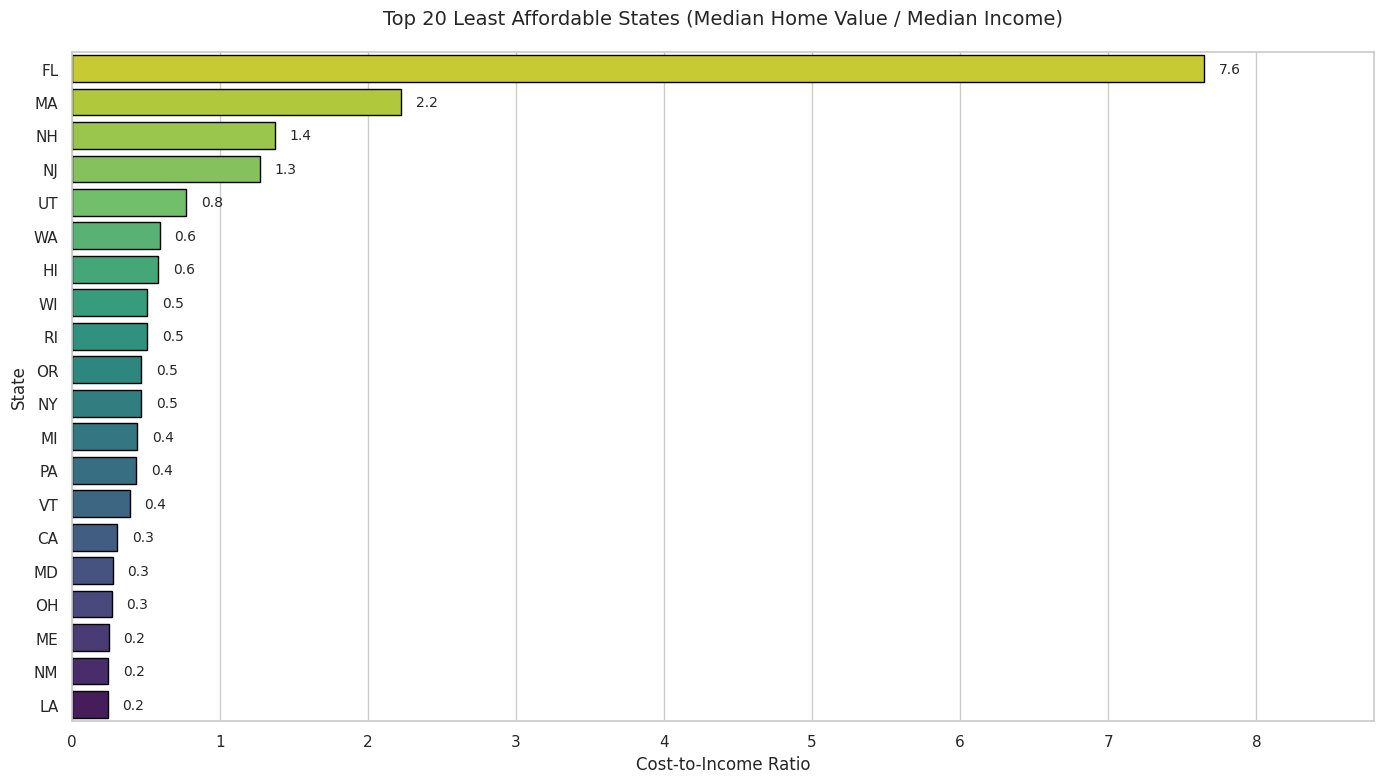

<Figure size 640x480 with 0 Axes>

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# top 20 least affordable states
top20 = state_affordability_sorted.head(20)
ax = sns.barplot(
    data=top20,
    x='State_CostToIncome',
    y='State',
    palette="viridis_r",
    edgecolor='black'
)

# annotate values
for i, (value, name) in enumerate(zip(top20['State_CostToIncome'], top20['State'])):
    ax.text(value + 0.1, i, f"{value:.1f}", ha='left', va='center', fontsize=10)

plt.title("Top 20 Least Affordable States (Median Home Value / Median Income)", fontsize=14, pad=20)
plt.xlabel("Cost-to-Income Ratio", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.xlim(0, top20['State_CostToIncome'].max() * 1.15)

plt.tight_layout()
plt.show()
plt.savefig('state_affordability_barplot.png', dpi=300, bbox_inches='tight')


In [184]:
# ======================
# RQ2
# ======================

numeric_cols = [
    'total_population', 'total_housing_units',
    'median_income', 'poverty_rate_pct',
    'rental_vacancy_rate', 'median_age',
    'median_home_value'  # added since it's used in CostToIncome_Ratio
]

for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')  # convert to float, invalid→NaN

# calculate derived metrics

merged_df['CostToIncome_Ratio'] = (
    merged_df['median_home_value'] / merged_df['median_income']
)

# define predictors
predictors = [
    'median_income',
    'population_density',
    'poverty_rate_pct',
    'rental_vacancy_rate',
    'median_age'
]

# clean data (drop rows with missing values)
model_data = merged_df[['CostToIncome_Ratio'] + predictors].dropna()

# run regression
macro_model = smf.ols(
    "CostToIncome_Ratio ~ median_income + population_density + poverty_rate_pct + rental_vacancy_rate + median_age",
    data=model_data
).fit()

print(macro_model.summary())

                            OLS Regression Results                            
Dep. Variable:     CostToIncome_Ratio   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.344e+06
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        22:54:43   Log-Likelihood:                -16586.
No. Observations:               80063   AIC:                         3.318e+04
Df Residuals:                   80057   BIC:                         3.324e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.9091    

In [185]:
# create poverty tertiles
merged_df['Poverty_Tertile'] = pd.qcut(merged_df['poverty_rate_pct'], 3, labels=['Low', 'Medium', 'High'])

# NLIHC-style affordability metric
affordability_metric = merged_df.groupby('state').apply(
    lambda x: (x['median_home_value'] < 3 * x['median_income']).mean() * 100
).sort_values()

# compare extremes (FL vs SD)
fl_sd_comparison = affordability_metric.loc[['12', '46']]
print("Affordability Comparison (FL vs SD):")
print(fl_sd_comparison)


Affordability Comparison (FL vs SD):
state
12     19.090184
46    100.000000
dtype: float64


<ipython-input-185-517c3b296133>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.




*** RQ3: Housing Unit Size vs. Household Needs ***

Using 'total_housing_units' as proxy for unit size


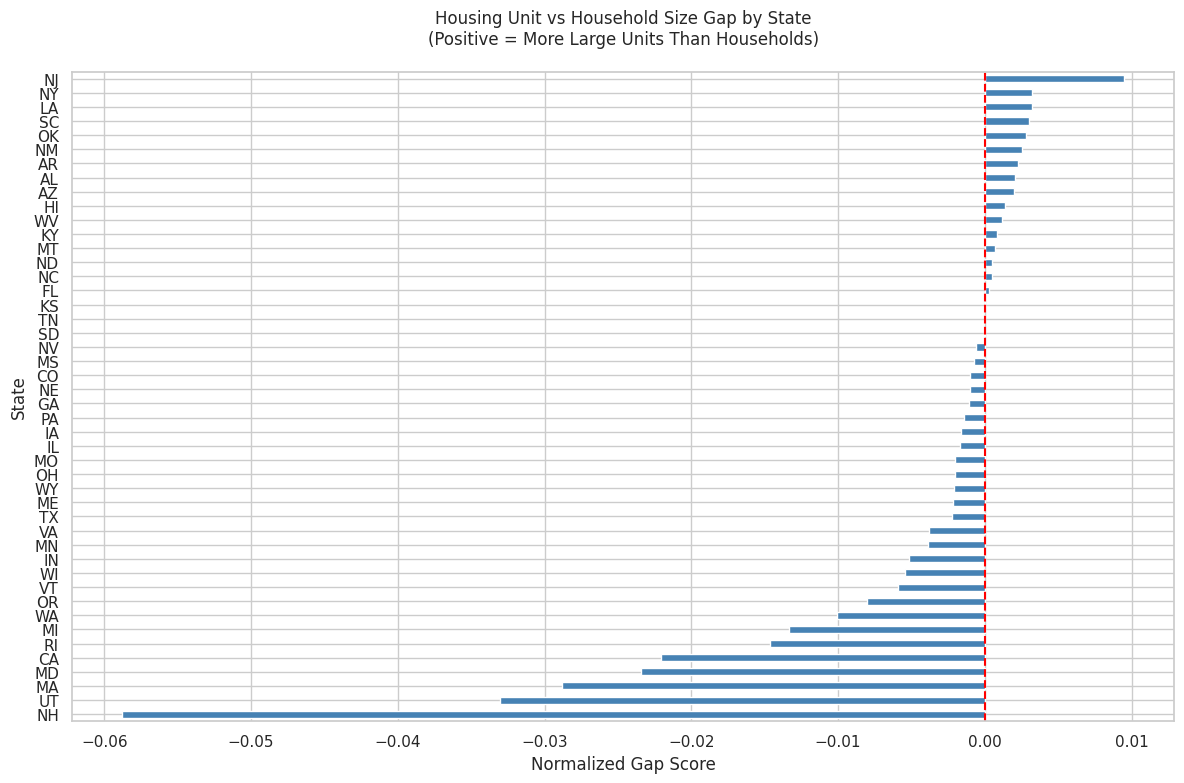

<Figure size 640x480 with 0 Axes>

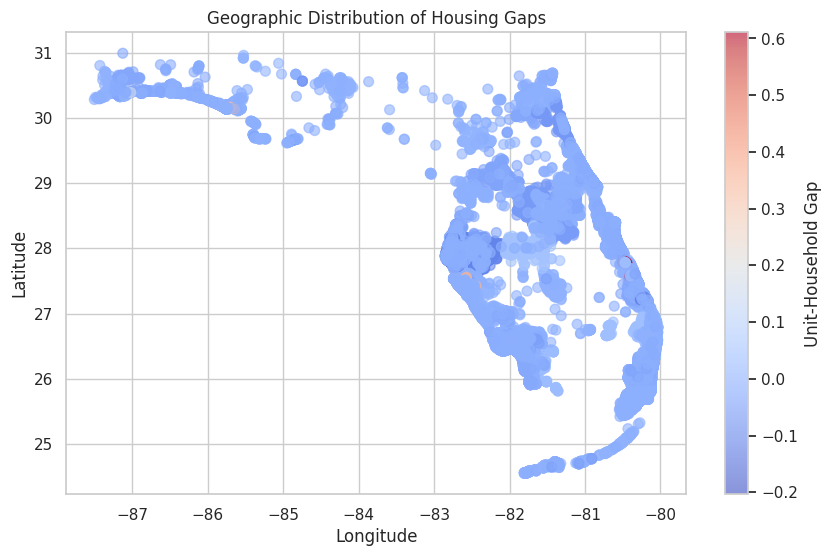


Key Findings:
- Average gap score: -0.00
- States with largest surplus: ['NJ', 'NY', 'LA']
- States with largest deficit: ['NH', 'UT', 'MA']


<Figure size 640x480 with 0 Axes>

In [188]:
# ======================
# RQ3
# ======================
print("\n*** RQ3: Housing Unit Size vs. Household Needs ***")

# check for required columns
if 'avg_household_size_owners' in merged_df.columns:
    # calculate % of large households (3+ members)
    merged_df['pct_large_households'] = (
        (merged_df['avg_household_size_owners'] >= 3).mean() * 100
    )

    # check for unit size proxies
    unit_size_proxies = [col for col in merged_df.columns
                        if 'unit' in col.lower() or 'famil' in col.lower()]

    if unit_size_proxies:
        proxy_col = unit_size_proxies[0]
        print(f"\nUsing '{proxy_col}' as proxy for unit size")

        # calculate gap metric
        merged_df['unit_gap'] = (
            merged_df[proxy_col].rank(pct=True) -
            merged_df['avg_household_size_owners'].rank(pct=True))

        # Visualization 1: Gap by state
        plt.figure(figsize=(12, 8))
        gap_by_state = merged_df.groupby('State')['unit_gap'].mean().sort_values()
        gap_by_state.plot(kind='barh', color='steelblue')
        plt.axvline(0, color='red', linestyle='--')
        plt.title("Housing Unit vs Household Size Gap by State\n(Positive = More Large Units Than Households)", pad=20)
        plt.xlabel("Normalized Gap Score")
        plt.ylabel("State")
        plt.tight_layout()
        plt.show()
        plt.savefig('unit_household_gap_by_state.png', dpi=300, bbox_inches='tight')

        # Visualization 2: Geographic distribution
        if 'CentroidLatitude' in merged_df.columns:
            plt.figure(figsize=(10, 6))
            plt.scatter(
                x=merged_df['CentroidLongitude'],
                y=merged_df['CentroidLatitude'],
                c=merged_df['unit_gap'],
                cmap='coolwarm',
                alpha=0.6,
                s=50
            )
            plt.colorbar(label='Unit-Household Gap')
            plt.title("Geographic Distribution of Housing Gaps")
            plt.xlabel("Longitude")
            plt.ylabel("Latitude")
            plt.show()

        print("\nKey Findings:")
        print(f"- Average gap score: {merged_df['unit_gap'].mean():.2f}")
        print(f"- States with largest surplus: {gap_by_state.nlargest(3).index.tolist()}")
        print(f"- States with largest deficit: {gap_by_state.nsmallest(3).index.tolist()}")
    else:
        print("\nNo suitable unit size proxy columns found. Available columns:")
        print([col for col in merged_df.columns if 'unit' in col.lower() or 'famil' in col.lower()])
else:
    print("\nMissing required column 'avg_household_size_owners'")


plt.savefig('housing_gaps_geographic.png', dpi=300, bbox_inches='tight')


In [192]:
# ======================
# RQ4
# ======================
print("\n*** RQ4: Climate Risk Analysis ***")

# check for required columns
required_cols = ['CentroidLatitude', 'CentroidLongitude', 'FloodZoneRiskLevel']
missing_cols = [col for col in required_cols if col not in merged_df.columns]

if not missing_cols:

    print("\n1. Flood Risk Distribution:")
    print(merged_df['FloodZoneRiskLevel'].value_counts())


    if 'rent_pct_income' in merged_df.columns:
        print("\n2. Average Rent Burden by Flood Risk:")
        print(merged_df.groupby('FloodZoneRiskLevel')['rent_pct_income'].agg(['mean', 'median', 'count']))


        from scipy.stats import kruskal
        groups = [merged_df[merged_df['FloodZoneRiskLevel'] == level]['rent_pct_income'].dropna()
                 for level in merged_df['FloodZoneRiskLevel'].unique()]
        if all(len(g) > 0 for g in groups):
            h_stat, p_val = kruskal(*groups)
            print(f"\n3. Kruskal-Wallis Test (rent burden vs flood risk):")
            print(f"   H-statistic: {h_stat:.2f}, p-value: {p_val:.4f}")
            print("   (Significant difference if p < 0.05)")

    # create Map
    fig = px.scatter_mapbox(merged_df,
                           lat='CentroidLatitude',
                           lon='CentroidLongitude',
                           color='FloodZoneRiskLevel',
                           size='rent_pct_income' if 'rent_pct_income' in merged_df.columns else None,
                           hover_name='NAME',
                           mapbox_style="open-street-map",
                           zoom=4)
    fig.update_layout(title='Flood Risk vs Rent Burden')
    fig.show()
    fig.write_html("flood_risk_map.html")

else:
    print(f"\nSKIPPED: Missing required columns - {missing_cols}")


*** RQ4: Climate Risk Analysis ***

1. Flood Risk Distribution:
Series([], Name: count, dtype: int64)

2. Average Rent Burden by Flood Risk:
Empty DataFrame
Columns: [mean, median, count]
Index: []


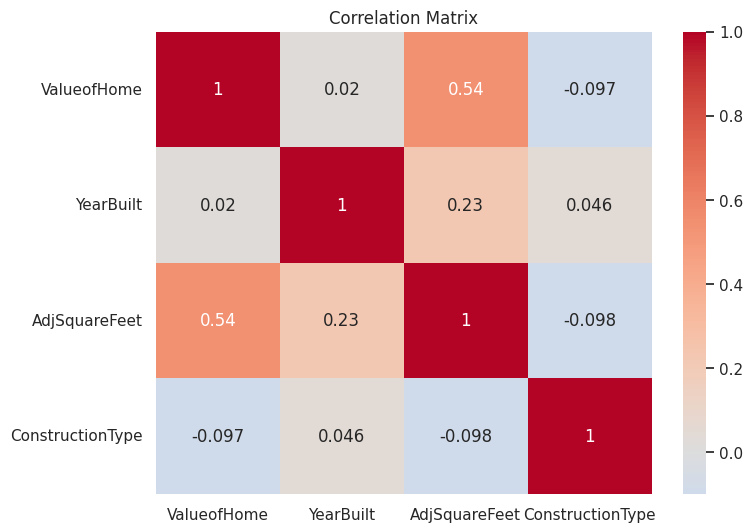

<Figure size 640x480 with 0 Axes>

In [194]:
# ======================
# RQ5: Insurance Claims Analysis (Forced Version)
# ======================

 # convert categorical to numeric
analysis_df = merged_df.copy()
analysis_df['ConstructionType'] = analysis_df['ConstructionType'].astype('category').cat.codes

# calculate correlations
corr_matrix = analysis_df[['ValueofHome', 'YearBuilt', 'AdjSquareFeet', 'ConstructionType']].corr()

# visualize
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()
plt.savefig('correlation_matrix_heatmap.png', dpi=300, bbox_inches='tight')



